In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
ad = pd.read_csv("advertising.csv")

In [5]:
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
ad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<Axes: >

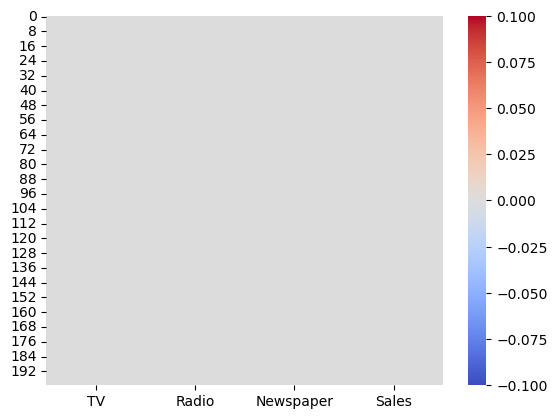

In [19]:
#checking for null values
sns.heatmap(ad.isnull(),cmap='coolwarm')

In [15]:
ad_column = ad[['TV','Radio','Newspaper']]

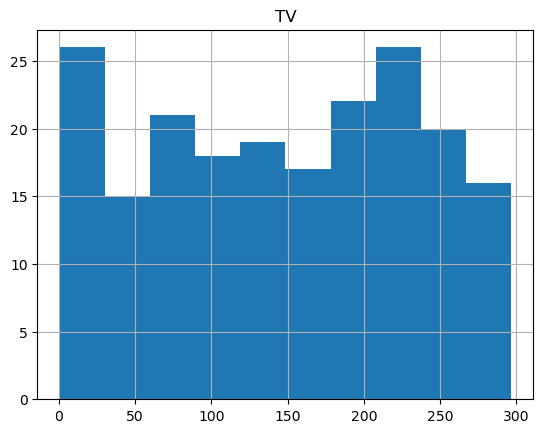

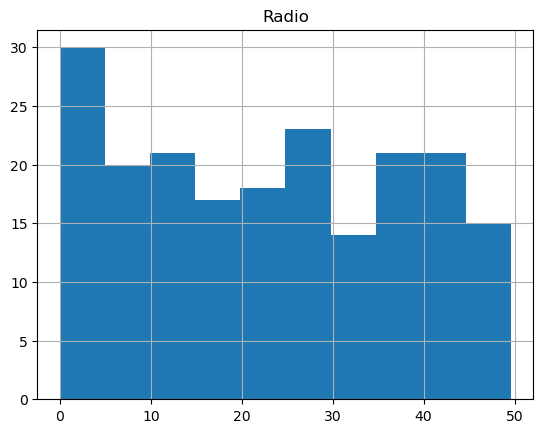

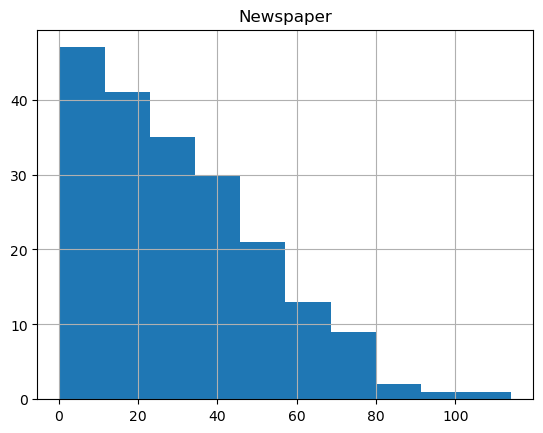

In [33]:
for col in ad_column.columns:
    ad_column[col].hist()
    plt.title(col)
    plt.show()

<Axes: xlabel='TV', ylabel='Sales'>

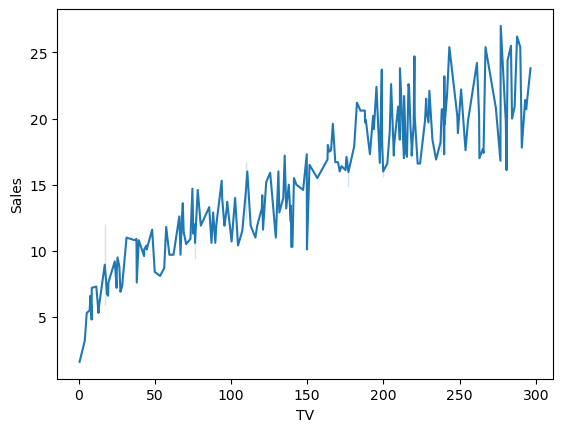

In [47]:
sns.lineplot(x='TV',y='Sales',data=ad)   

<Axes: xlabel='Radio', ylabel='Sales'>

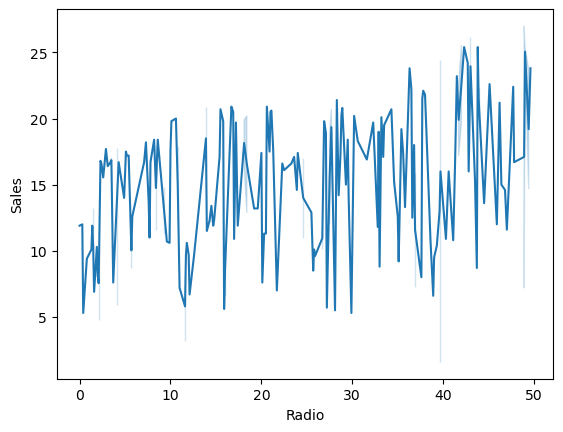

In [49]:
sns.lineplot(x='Radio',y='Sales',data=ad)  

<Axes: xlabel='Newspaper', ylabel='Sales'>

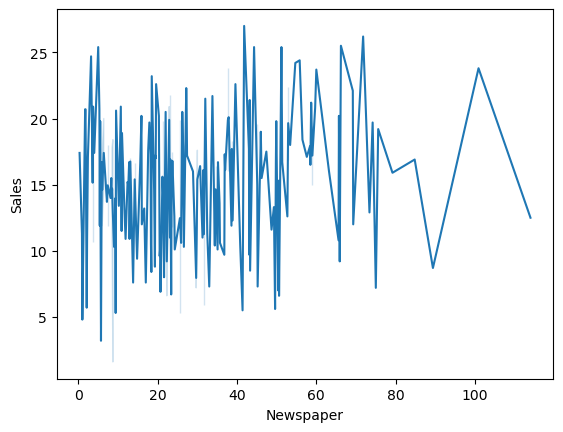

In [51]:
sns.lineplot(x='Newspaper',y='Sales',data=ad)  

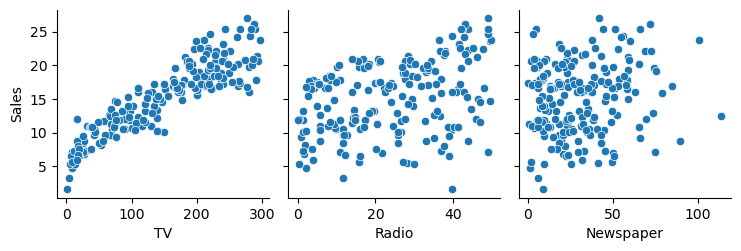

In [59]:
sns.pairplot(ad,x_vars=['TV','Radio','Newspaper'],y_vars='Sales')

In [55]:
correlation = ad[['TV', 'Radio', 'Newspaper', 'Sales']].corr()

In [61]:
correlation

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

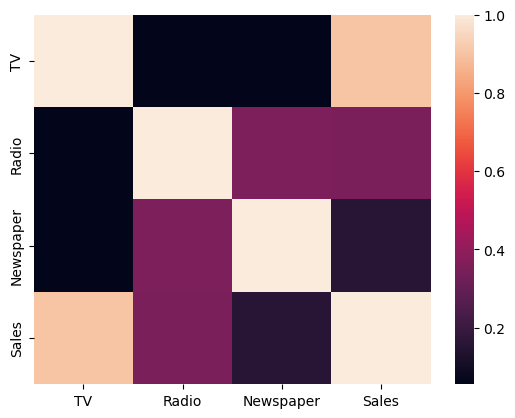

In [57]:
sns.heatmap(correlation)

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ad.drop('Sales',axis=1),ad['Sales'],test_size = 0.3,random_state=100)

In [79]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [81]:
predictions = model.predict(X_test)

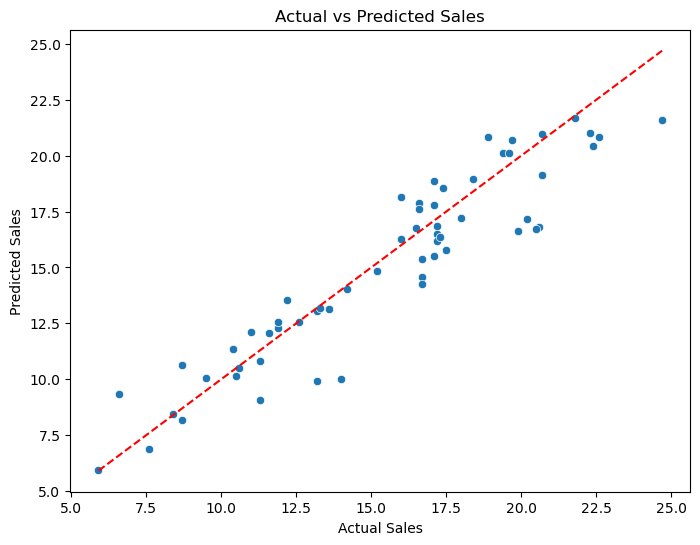

In [95]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate the predictions
y_pred = model.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 1.2278183566589411
Mean Squared Error (MSE): 2.6360765623280664
Root Mean Squared Error (RMSE): 1.6235998775338911
R² Score: 0.8655979373420272
